# Marginal GP
*Nicolas Knudde*

This notebook demonstrates the approximate marginalisation of the hyperparameters during testing time. A Laplace approximation is used here and is described in Garnett et. al. (2013)

In [1]:
%matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt


import GPflow
import GPflowOpt
import numpy as np

First we set up a test dataset

In [2]:
np.random.seed(3)
x = np.random.rand(8, 1) * 8-4
y = np.cos(x) +np.random.randn(8,1)*0.1

We proceed by constructing a Marginal GP wrapper around a GPR object and defining some suitable priors on the hyperparameters. Eventually we optimise the model.

In [3]:
m = GPflowOpt.models.MGP(GPflow.gpr.GPR(x, y, GPflow.kernels.RBF(1, lengthscales=1, variance=1)))
m.kern.lengthscales.prior = GPflow.priors.Gamma(3, 1/3)
m.kern.variance.prior = GPflow.priors.Gamma(3, 1/3)
m.likelihood.variance.prior = GPflow.priors.LogNormal(0, 1)
m.optimize()

      fun: 11.219668379985972
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -8.31933750e-06,   6.32051531e-06,  -1.65760996e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 9
      nit: 6
   status: 0
  success: True
        x: array([ 0.77306105,  0.02511576, -1.60659824])

Now we compare the prediction of the MGP and the regular GPR model.

Evaluated


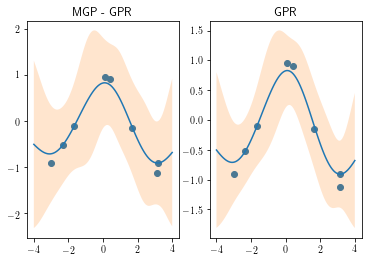

In [4]:
X = np.array(np.linspace(-4, 4, 100)[:, None])
fms, fvs = m.predict_f(X)
print('Evaluated')

plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(X.flatten(), fms.flatten())
plt.fill_between(X.flatten(), fms.flatten() - 2 * np.sqrt(fvs.flatten()), fms.flatten() + 2 * np.sqrt(fvs.flatten()),
                 alpha=0.2)
plt.title('MGP - GPR')
plt.subplot(1, 2, 2)
plt.scatter(x, y)
fm, fv = m.wrapped.predict_f(X)
plt.plot(X.flatten(), fm.flatten())
plt.fill_between(X.flatten(), fm.flatten() - 2 * np.sqrt(fv.flatten()), fm.flatten() + 2 * np.sqrt(fv.flatten()),
                 alpha=0.2)
plt.title('GPR')
plt.show()